# Chris Paul Project Data

In [477]:
import requests, bs4
from bs4 import BeautifulSoup as bs
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import numpy as np

## Scrape Data

In [ ]:
# Identified a website with the desired data and scraped the desired table through Pandas

In [478]:
df = pd.read_html('https://www.basketball-reference.com/players/p/paulch01/gamelog/2022')[7]

In [479]:
df.head()

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1,2021-10-20,36-167,PHO,NaN,DEN,L (-12),1,33:37,...,2,4,10,2,1,3,3,15,16.8,-23
1,2,2,2021-10-22,36-169,PHO,@,LAL,W (+10),1,29:14,...,5,5,14,2,0,5,3,23,24.1,+6
2,3,3,2021-10-23,36-170,PHO,@,POR,L (-29),1,25:30,...,2,2,11,1,0,1,0,4,9.6,-29
3,4,4,2021-10-27,36-174,PHO,NaN,SAC,L (-3),1,29:44,...,3,6,8,2,0,1,2,6,8.2,-10
4,5,5,2021-10-30,36-177,PHO,NaN,CLE,W (+9),1,36:44,...,2,2,10,4,0,2,2,16,18.6,+18


In [ ]:
# Iterated through seasons 2006 through 2022. Each season was located on it's own page. Appended to a larger df

In [480]:
def get_data(season_nums):
    url = "https://www.basketball-reference.com/players/p/paulch01/gamelog/{}" #url with formatting to fill in the number of the particular week
    dfs = []
    for season in season_nums: #for each week
        file_url = url.format(season) #format the url so it grabs that week
        dfs.append(pd.read_html(file_url)[7]) #append to our empty list
    return pd.concat(dfs) #combine files for each week
        
season_nums = [num for num in range(2006, 2023)]
cp_data = get_data(season_nums)
cp_data

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1,2005-11-01,20-179,NOK,NaN,SAC,W (+26),1,33:32,...,8,8,4,2,1,4,0,13,13.2,+23
1,2,2,2005-11-02,20-180,NOK,@,CLE,L (-22),1,29:20,...,4,5,3,2,0,4,1,13,8.9,-19
2,3,3,2005-11-05,20-183,NOK,@,HOU,W (+7),1,33:04,...,3,4,8,2,0,1,4,15,13.8,+4
3,4,4,2005-11-09,20-187,NOK,NaN,ORL,L (-5),1,35:29,...,3,4,4,3,0,0,4,10,8.3,-6
4,5,5,2005-11-12,20-190,NOK,NaN,DAL,L (-6),1,36:14,...,2,3,5,1,0,5,4,26,19.0,-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,79,64,2022-04-05,36-334,PHO,NaN,LAL,W (+11),1,23:51,...,2,4,12,2,0,1,1,6,13.3,+22
82,80,NaN,2022-04-06,36-335,PHO,@,LAC,L (-4),Did Not Dress,Did Not Dress,...,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress,Did Not Dress
83,Rk,G,Date,Age,Tm,NaN,Opp,NaN,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
84,81,65,2022-04-08,36-337,PHO,@,UTA,W (+6),1,37:37,...,5,6,16,2,0,3,3,16,22.3,+18


In [481]:
cp_data = cp_data[['Date', 'Age', 'Tm', 'Unnamed: 5', 'Opp', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA','3P%',
                  'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-']]

In [482]:
cp_data.columns = ['Date', 'Age', 'Team', 'Home/Away', 'Opp', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA','3P%',
                  'FT', 'FTA', 'FT%', 'Off_RB', 'Def_RB', 'Tot_RB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-']

In [483]:
cp_data.head()

,Date,Age,Team,Home/Away,Opp,MP,FG,FGA,FG%,3P,...,Def_RB,Tot_RB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,2005-11-01,20-179,NOK,NaN,SAC,33:32,3,7,.429,1,...,8,8,4,2,1,4,0,13,13.2,+23
1,2005-11-02,20-180,NOK,@,CLE,29:20,5,11,.455,1,...,4,5,3,2,0,4,1,13,8.9,-19
2,2005-11-05,20-183,NOK,@,HOU,33:04,6,14,.429,1,...,3,4,8,2,0,1,4,15,13.8,+4
3,2005-11-09,20-187,NOK,NaN,ORL,35:29,4,13,.308,0,...,3,4,4,3,0,0,4,10,8.3,-6
4,2005-11-12,20-190,NOK,NaN,DAL,36:14,10,14,.714,2,...,2,3,5,1,0,5,4,26,19.0,-11


## Data Cleaning

In [ ]:
# Removed entries with not statistical data

In [484]:
cp_data = cp_data.loc[cp_data['Date'] != 'Date']
cp_data = cp_data.loc[cp_data['MP'] != 'Did Not Dress']
cp_data = cp_data.loc[cp_data['MP'] != 'Inactive']
cp_data = cp_data.loc[cp_data['MP'] != 'Did Not Play']
cp_data = cp_data.loc[cp_data['MP'] != 'Not With Team']

In [485]:
cp_data.shape

(1155, 26)

In [486]:
cp_data['Date'] = pd.to_datetime(cp_data['Date'])
num_cols = ['FG', 'FGA', 'FG%', '3P', '3PA','3P%','FT', 'FTA', 'FT%', 
            'Off_RB', 'Def_RB', 'Tot_RB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-']

cp_data[num_cols] = cp_data[num_cols].apply(pd.to_numeric)

In [487]:
# Some of the % stats contained null values. Replaced them with 0
cp_data.loc[:, 'FT':'FT%'].head(20)

,FT,FTA,FT%
0,6,6,1.000
1,2,2,1.000
2,2,3,0.667
3,2,2,1.000
4,4,5,0.800
5,6,7,0.857
6,8,9,0.889
7,6,8,0.750
8,6,6,1.000
9,3,4,0.750


In [488]:
cp_data['FT%'] = cp_data['FT%'].fillna(0)
cp_data['3P%'] = cp_data['3P%'].fillna(0)
cp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 84
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1155 non-null   datetime64[ns]
 1   Age        1155 non-null   object        
 2   Team       1155 non-null   object        
 3   Home/Away  575 non-null    object        
 4   Opp        1155 non-null   object        
 5   MP         1155 non-null   object        
 6   FG         1155 non-null   int64         
 7   FGA        1155 non-null   int64         
 8   FG%        1155 non-null   float64       
 9   3P         1155 non-null   int64         
 10  3PA        1155 non-null   int64         
 11  3P%        1155 non-null   float64       
 12  FT         1155 non-null   int64         
 13  FTA        1155 non-null   int64         
 14  FT%        1155 non-null   float64       
 15  Off_RB     1155 non-null   int64         
 16  Def_RB     1155 non-null   int64         
 1

In [527]:
# Split data into a 60-20-20 split train-test split

In [489]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [490]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cp_data = cp_data.select_dtypes(include=numerics)

X, X_test, y, y_test = train_test_split(cp_data.drop(columns = ['PTS','FG', 'FG%', '3P', '3P%', 'FT', 'FT%', 'Tot_RB', 'GmSc', '+/-']), 
                                        cp_data['PTS'], test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=40)

In [491]:
cp_data = cp_data.reset_index()

In [492]:
cp_data.drop(columns = ['index'], inplace = True)

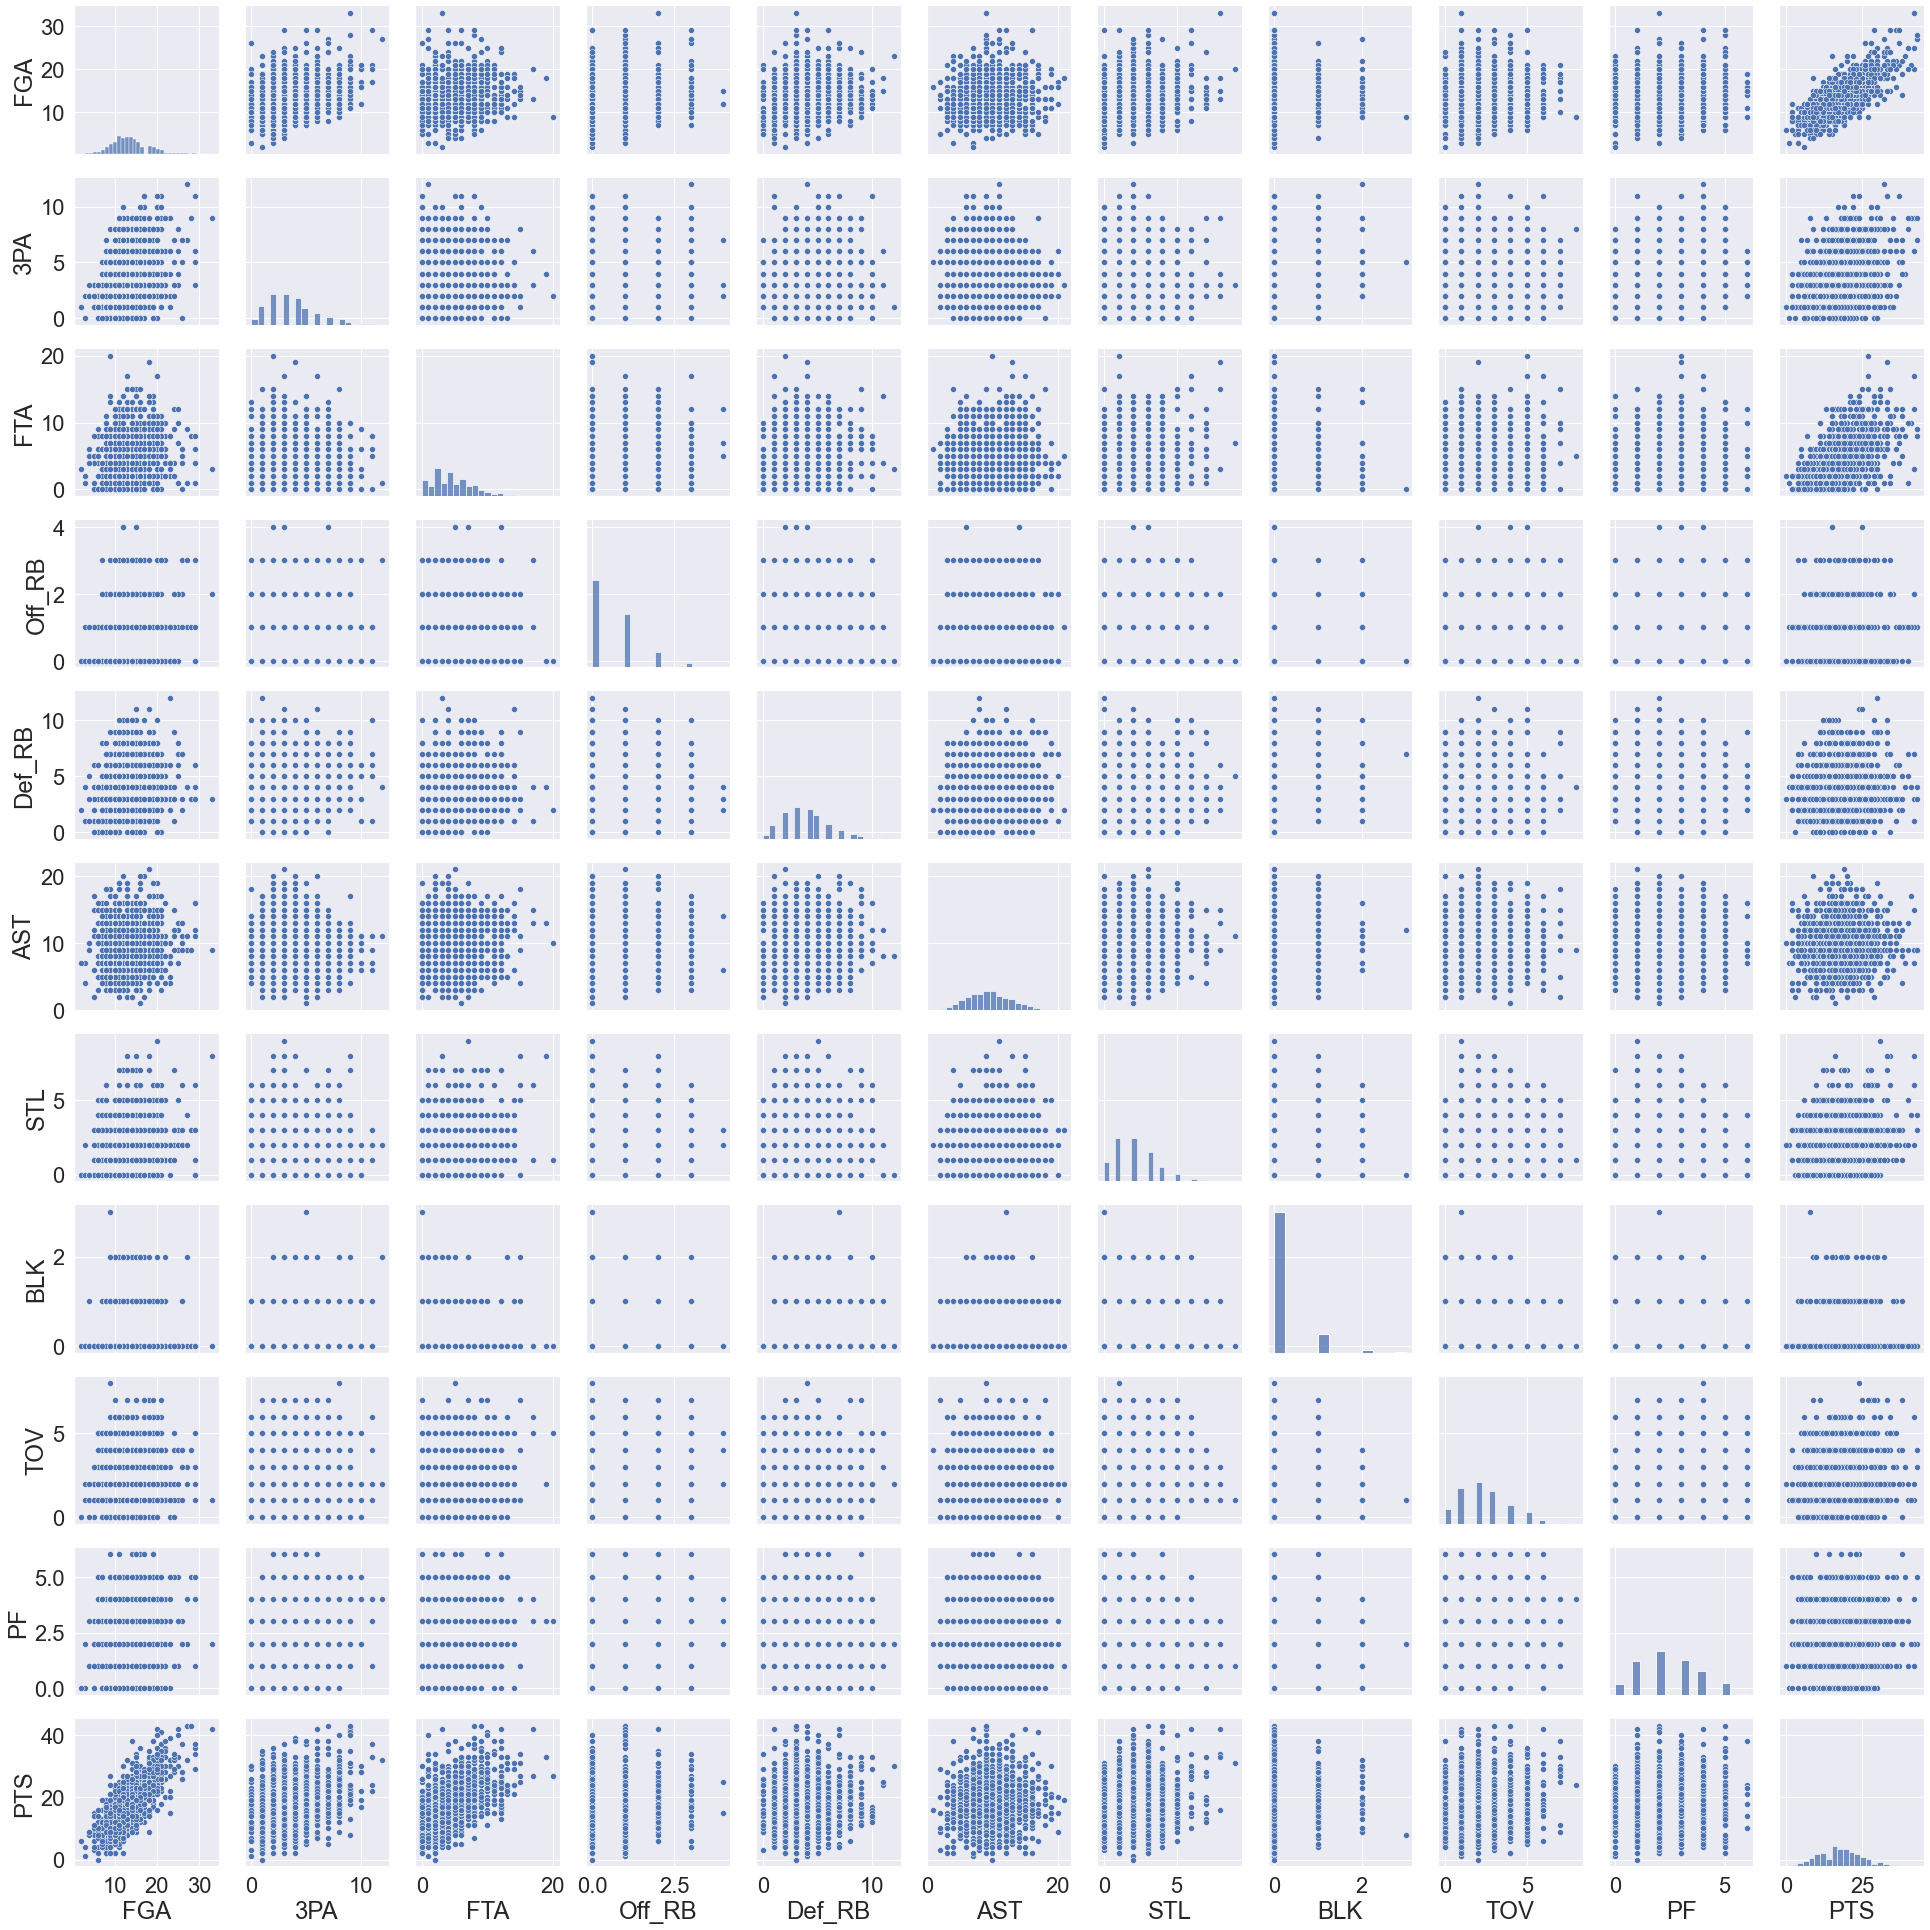

In [493]:
# built a pairplot to visualize the data

sns.pairplot(cp_data.drop(columns = ['FG', 'FG%', '3P', '3P%', 'FT', 'FT%', 'Tot_RB', 'GmSc', '+/-']))
sns.set(font_scale = 2)

## Build and Train Regression Model

In [495]:
#Built a regression model with the train data. Target feature was points.

x = X_train
x = sm.add_constant(x)
y = y_train

model = sm.OLS(y,x)
cp_model = model.fit()
cp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     152.3
Date:                Tue, 19 Apr 2022   Prob (F-statistic):          2.25e-166
Time:                        16:00:00   Log-Likelihood:                -1930.4
No. Observations:                 693   AIC:                             3883.
Df Residuals:                     682   BIC:                             3933.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8927      0.746     -2.538      0.011      -3.357      -0.428
FGA            1.1180      0.041     27.117      0.000       1.037       1.199
3PA            0.3971      0.077      5.130      0.000       0.245       0.549
FTA            0.8101      0.047     17.235      0.000       0.718       0.902
Off_RB        -0.9169      0.196     -4.667      0.000      -1.303      -0.531
Def_RB        -0.0358      0.075     -0.478      0.633      -0.183       0.111
AST            0.0396      0.045      0.886      0.376      -0.048       0.127
STL            0.0296      0.101      0.293      0.770      -0.169       0.228
BLK            0.6058      0.385      1.575      0.116      -0.149       1.361
TOV            0.0991      0.102      0.975      0.330      -0.101       0.299
PF            -0.1670      0.110     -1.523      0.128      -0.382       0.048
==============================================================================
Omnibus:                        0.343   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.842   Jarque-Bera (JB):                0.256
Skew:                          -0.041   Prob(JB):                        0.880
Kurtosis:                       3.046   Cond. No.                         93.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [496]:
# added a Residual column to calculate both the MAE and the RMSE

cp_data_train = cp_data.loc[0:692]
cp_data_train['Predict'] = cp_model.predict()
cp_data_train['Res'] = cp_data_train['PTS'] - cp_data_train['Predict']

RSME_train = sqrt(mean_squared_error(cp_data_train['PTS'], cp_data_train['Predict']))
np.float64(RSME_train).round(3)

/var/folders/jp/xm9dnpj90dz66_3yfv7zskl00000gn/T/ipykernel_79684/2852499278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cp_data_train['Predict'] = cp_model.predict()
/var/folders/jp/xm9dnpj90dz66_3yfv7zskl00000gn/T/ipykernel_79684/2852499278.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cp_data_train['Res'] = cp_data_train['PTS'] - cp_data_train['Predict']


9.67

In [497]:
MAE_train = mean_absolute_error(cp_data_train['PTS'], cp_data_train['Predict'])
MAE_train.round(3)

7.696

In [498]:
# Though the R^2 value was relatively high, I removed Def Rebounds and Steals features as they were not significant
# Retrained a new model.

X, X_test, y, y_test = train_test_split(cp_data.drop(columns = ['PTS','FG', 'FG%', '3P', '3P%', 'FT', 'FT%', 
                                                                'Tot_RB', 'GmSc', '+/-', 'STL', 'Def_RB']), 
                                        cp_data['PTS'], test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=40)

x = X_train
x = sm.add_constant(x)
y = y_train

model = sm.OLS(y,x)
cp_model = model.fit()
cp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     190.8
Date:                Tue, 19 Apr 2022   Prob (F-statistic):          1.39e-168
Time:                        16:00:00   Log-Likelihood:                -1930.6
No. Observations:                 693   AIC:                             3879.
Df Residuals:                     684   BIC:                             3920.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9396      0.721     -2.689      0.007      -3.356      -0.523
FGA            1.1178      0.041     27.574      0.000       1.038       1.197
3PA            0.3940      0.077      5.109      0.000       0.243       0.545
FTA            0.8096      0.047     17.364      0.000       0.718       0.901
Off_RB        -0.9147      0.196     -4.663      0.000      -1.300      -0.530
AST            0.0392      0.044      0.884      0.377      -0.048       0.126
BLK            0.5716      0.379      1.507      0.132      -0.173       1.317
TOV            0.0978      0.101      0.964      0.335      -0.101       0.297
PF            -0.1687      0.109     -1.541      0.124      -0.384       0.046
==============================================================================
Omnibus:                        0.356   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.837   Jarque-Bera (JB):                0.262
Skew:                          -0.041   Prob(JB):                        0.877
Kurtosis:                       3.050   Cond. No.                         88.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# We can see that R^2 Adjusted increased slightly after removing the features, while R^2 remained the same

In [499]:
# Fit a simple linear regression on training set
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.6905255448992883

In [500]:
lr.score(X_val, y_val)

0.7229172826112107

In [501]:
lr.score(X_test, y_test)

0.6999088263012905

In [ ]:
# Though the R^2 value are relatively the same, there may be some overfitting for our val data set

In [502]:
cp_data_train = cp_data.loc[0:692]
cp_data_train['Predict'] = lr.predict(X_train)
cp_data_train['Res'] = cp_data_train['PTS'] - cp_data_train['Predict']

RSME_train = sqrt(mean_squared_error(cp_data_train['PTS'], cp_data_train['Predict']))
np.float64(RSME_train).round(3)

/var/folders/jp/xm9dnpj90dz66_3yfv7zskl00000gn/T/ipykernel_79684/4007797721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cp_data_train['Predict'] = lr.predict(X_train)
/var/folders/jp/xm9dnpj90dz66_3yfv7zskl00000gn/T/ipykernel_79684/4007797721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cp_data_train['Res'] = cp_data_train['PTS'] - cp_data_train['Predict']


9.671

In [503]:
MAE_train = mean_absolute_error(cp_data_train['PTS'], cp_data_train['Predict'])
MAE_train.round(3)

7.698

## Tried Other Regression Models

In [ ]:
# I decided to try a polynomial and LASSO regression model just to see what they look like

In [504]:
from sklearn.preprocessing import PolynomialFeatures

In [505]:
# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
lr_poly.score(X_train_poly,y_train)

-0.134311703695297

In [506]:
# This model turned out to be significantly worse in terms of R^2

lr_poly.score(X_val_poly, y_val)

-0.25786453227639594

In [507]:
poly.get_feature_names()

/Users/averypeterson/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x5^2',
 'x5 x6',
 'x5 x7',
 'x6^2',
 'x6 x7',
 'x7^2']

In [508]:
lr_poly.coef_

array([ 5.35665246e+12,  9.68360577e-01,  2.65590497e+00, -1.03025472e+00,
       -7.76111956e-01,  3.49496663e+00,  3.86903276e+00, -3.79204325e-01,
       -4.55910748e-01,  2.76336724e-02, -4.47256052e-02,  9.34285528e-02,
        2.23718067e-01,  2.18331222e-02, -2.08274345e-01, -2.84831455e-01,
       -2.58472655e-01, -9.99377932e-02, -1.14414281e-01,  5.68480839e-01,
       -2.94315533e-01, -2.76114998e-01,  9.91414733e-01, -4.12042840e-02,
        2.36636285e-02, -7.80808722e-02,  3.35206843e-03, -1.32088079e+00,
        5.07626253e-02,  2.27998569e-01, -8.92858656e-01, -4.91528007e-01,
        1.89725362e+00,  6.58152911e-01,  7.86927880e-02, -8.13129789e-02,
        1.29080928e-01, -3.71218851e-02, -3.30466436e-01,  2.48277647e+00,
       -5.23931780e-01,  8.64756939e-01,  5.10942200e-01, -8.29936270e-01,
        1.55299726e+00])

In [509]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler

In [510]:
# Don't forget to standard scale your data for regularized regression
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)

# Apply the same scaler to val set
X_val_poly_scaled = scaler.transform(X_val_poly)

# Fit a LASSO model using polynomial features
lasso = LassoCV()
lasso.fit(X_train_poly_scaled,y_train)
lasso.score(X_train_poly_scaled,y_train)

0.6949556453070276

In [511]:
# The LASSO model was about the same in terms of R^2; however, the model's coefficient's were much more complicated
# Determined it was not interpretable

lasso.score(X_val_poly_scaled, y_val)

0.718321641460291

In [512]:
lasso.coef_

array([ 0.        ,  3.34804869,  0.        ,  1.71540594, -0.13800762,
        0.13343663,  0.        ,  0.        , -0.10968535,  0.75059877,
        0.61756586,  0.40284364, -0.01392257,  0.        ,  0.08169484,
        0.05929706, -0.        ,  0.29375608,  0.12901804, -0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.37390084,
        0.        ,  0.        ,  0.        ,  0.1781519 ,  0.        ,
       -0.18776858, -0.31380184, -0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.09910056,  0.        , -0.0095014 , -0.        ])

## Final Regression Score and Calculations

In [526]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.6999088263012905

In [524]:
# Created some final R^2, MAE, and RSME score for the original regression model

cp_data_test = cp_data.loc[924:]
cp_data_test['Predict'] = lr.predict(X_test)
cp_data_test['Res'] = cp_data_test['PTS'] - cp_data_test['Predict']

RSME_test = sqrt(mean_squared_error(cp_data_test['PTS'], cp_data_test['Predict']))
np.float64(RSME_test).round(3)

/var/folders/jp/xm9dnpj90dz66_3yfv7zskl00000gn/T/ipykernel_79684/1445257736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cp_data_test['Predict'] = lr.predict(X_test)
/var/folders/jp/xm9dnpj90dz66_3yfv7zskl00000gn/T/ipykernel_79684/1445257736.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cp_data_test['Res'] = cp_data_test['PTS'] - cp_data_test['Predict']


9.087

In [525]:
MAE_test = mean_absolute_error(cp_data_test['PTS'], cp_data_test['Predict'])
MAE_test.round(3)

7.362

In [446]:
cp_data['Predict'] = lr.predict(x)
cp_data['Res'] = cp_data['PTS'] - cp_data['Predict']

/Users/averypeterson/opt/anaconda3/envs/metis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Residual Errors')

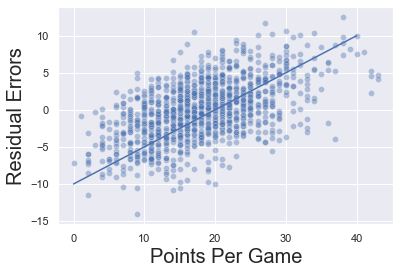

In [469]:
# Built of a scatter plot of Residuals and actual Points to show visual of error variance

sns.scatterplot(cp_data['PTS'], cp_data['Res'],
               alpha = 0.4)
ax = sns.lineplot(x = (0,40),
            y = (-10, 10))
sns.set(font_scale = 1)
ax.set_xlabel("Points Per Game", fontsize = 20)
ax.set_ylabel("Residual Errors", fontsize = 20)